# 🧠 Customer Personality Analysis EDA

## 🎯 Mục Tiêu
Phân tích khám phá dữ liệu Customer Personality Analysis để hiểu:
- Customer demographics và behavior patterns
- Purchase preferences và spending habits
- Marketing campaign effectiveness
- Customer segmentation dựa trên personality
- RFM analysis và customer lifetime value

## 📋 Dataset Overview
- **Nguồn**: Customer Personality Analysis Dataset (Kaggle)
- **Số lượng**: 2,240 khách hàng
- **Features**: Demographics, Purchase behavior, Campaign responses
- **Mục tiêu**: Customer segmentation, Marketing optimization, Behavioral insights

## 🔍 Kỹ Thuật Sẽ Sử Dụng
- Customer segmentation (K-means clustering)
- RFM Analysis (Recency, Frequency, Monetary)
- Purchase behavior analysis
- Marketing campaign effectiveness
- Demographic analysis
- Personality-based clustering


In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Cài đặt style cho plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Đã import thành công tất cả thư viện!")
print("🧠 Sẵn sàng bắt đầu phân tích Customer Personality Analysis!")


✅ Đã import thành công tất cả thư viện!
🧠 Sẵn sàng bắt đầu phân tích Customer Personality Analysis!


## 📊 Bước 1: Data Loading & Overview


In [2]:
# Load dataset
df = pd.read_csv('../data/raw/customer_personality_analysis.csv')

print("🔍 THÔNG TIN CƠ BẢN VỀ CUSTOMER PERSONALITY DATASET")
print("=" * 60)
print(f"📊 Shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 COLUMNS INFO:")
print("=" * 30)
print(df.info())

print("\n🔢 DATA TYPES:")
print("=" * 20)
print(df.dtypes)

print("\n📊 SAMPLE DATA (5 rows đầu):")
print("=" * 35)
df.head()


🔍 THÔNG TIN CƠ BẢN VỀ CUSTOMER PERSONALITY DATASET
📊 Shape: (2240, 27)
💾 Memory usage: 0.83 MB

📋 COLUMNS INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1,1978,Master,Single,106781.46,1,0,2012-11-05,9,1239.89,...,6,13,10,0,0,0,0,0,1,0
1,2,1997,Graduation,Widow,51945.54,0,0,2018-01-09,203,649.99,...,1,18,12,0,1,0,0,0,0,0
2,3,1945,Master,Widow,95469.04,0,1,2014-10-02,54,1487.79,...,6,8,13,0,1,0,0,0,0,0
3,4,1979,Master,Divorced,81569.47,0,2,2017-05-23,238,1687.73,...,4,15,6,0,0,0,0,0,0,1
4,5,1993,Master,Single,82476.76,1,1,2013-07-14,25,1183.47,...,2,20,14,0,0,1,0,1,0,0


In [3]:
# Kiểm tra missing values và data quality
print("🔍 DATA QUALITY CHECK")
print("=" * 30)

# Missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})

print("Missing Values:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ Không có missing values trong dataset!")

# Duplicate check
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate customers: {duplicates}")

# Unique values cho categorical columns
print("\n📊 UNIQUE VALUES:")
print("=" * 25)
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    print(f"  Values: {list(df[col].unique())}")
    print()

# Data range check
print("📈 NUMERICAL RANGES:")
print("=" * 25)
numerical_cols = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts']
for col in numerical_cols:
    print(f"{col}: {df[col].min():.2f} - {df[col].max():.2f}")


🔍 DATA QUALITY CHECK
Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
✅ Không có missing values trong dataset!

🔄 Duplicate customers: 0

📊 UNIQUE VALUES:
Education: 5 unique values
  Values: ['Master', 'Graduation', 'Basic', 'PhD', '2n Cycle']

Marital_Status: 8 unique values
  Values: ['Single', 'Widow', 'Divorced', 'Married', 'YOLO', 'Together', 'Alone', 'Absurd']

📈 NUMERICAL RANGES:
Year_Birth: 1940.00 - 1999.00
Income: 16525.37 - 143767.85
Recency: 1.00 - 364.00
MntWines: 69.55 - 3214.92
MntFruits: 6.33 - 276.69
MntMeatProducts: 53.08 - 834.39


## 📊 Bước 2: Data Preprocessing & Feature Engineering


In [4]:
# Feature Engineering
print("🔧 FEATURE ENGINEERING")
print("=" * 30)

# Tính Age từ Year_Birth
df['Age'] = 2023 - df['Year_Birth']

# Tính Total Amount Spent
df['Total_Spent'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Tính Total Purchases
df['Total_Purchases'] = (df['NumWebPurchases'] + df['NumCatalogPurchases'] + 
                        df['NumStorePurchases'] + df['NumDealsPurchases'])

# Tính Total Children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Tính Total Accepted Campaigns
df['Total_Accepted_Cmp'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + 
                           df['AcceptedCmp4'] + df['AcceptedCmp5'])

# Tính Average Purchase Value
df['Avg_Purchase_Value'] = df['Total_Spent'] / df['Total_Purchases'].replace(0, 1)

# Tạo Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], 
                        labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Tạo Income Groups
df['Income_Group'] = pd.cut(df['Income'], bins=[0, 30000, 50000, 70000, 100000, float('inf')], 
                           labels=['Low', 'Medium', 'High', 'Very High', 'Premium'])

# Tạo Spending Groups
df['Spending_Group'] = pd.cut(df['Total_Spent'], bins=[0, 1000, 3000, 6000, float('inf')], 
                             labels=['Low', 'Medium', 'High', 'VIP'])

print("✅ Đã tạo thành công các features mới:")
print("  • Age: Tuổi khách hàng")
print("  • Total_Spent: Tổng chi tiêu")
print("  • Total_Purchases: Tổng số lần mua")
print("  • Total_Children: Tổng số con")
print("  • Total_Accepted_Cmp: Tổng số campaign đã chấp nhận")
print("  • Avg_Purchase_Value: Giá trị trung bình mỗi lần mua")
print("  • Age_Group: Nhóm tuổi")
print("  • Income_Group: Nhóm thu nhập")
print("  • Spending_Group: Nhóm chi tiêu")

print(f"\n📊 Dataset shape sau feature engineering: {df.shape}")


🔧 FEATURE ENGINEERING
✅ Đã tạo thành công các features mới:
  • Age: Tuổi khách hàng
  • Total_Spent: Tổng chi tiêu
  • Total_Purchases: Tổng số lần mua
  • Total_Children: Tổng số con
  • Total_Accepted_Cmp: Tổng số campaign đã chấp nhận
  • Avg_Purchase_Value: Giá trị trung bình mỗi lần mua
  • Age_Group: Nhóm tuổi
  • Income_Group: Nhóm thu nhập
  • Spending_Group: Nhóm chi tiêu

📊 Dataset shape sau feature engineering: (2240, 36)


## 📊 Bước 3: Statistical Analysis


In [5]:
# Statistical summary cho numerical columns
print("📊 STATISTICAL SUMMARY")
print("=" * 30)
numerical_cols = ['Age', 'Income', 'Total_Spent', 'Total_Purchases', 'Avg_Purchase_Value', 
                  'Recency', 'Total_Children', 'Total_Accepted_Cmp']
print(df[numerical_cols].describe().round(2))

# Thêm một số thống kê bổ sung
print("\n📈 ADDITIONAL STATISTICS")
print("=" * 35)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Skewness: {df[col].skew():.3f}")
    print(f"  Kurtosis: {df[col].kurtosis():.3f}")


📊 STATISTICAL SUMMARY
           Age     Income  Total_Spent  Total_Purchases  Avg_Purchase_Value  \
count  2240.00    2240.00      2240.00          2240.00             2240.00   
mean     53.73   71367.42      2054.57            28.07               76.20   
std      17.70   25605.98       642.67             5.49               28.87   
min      24.00   16525.37       513.83            12.00               15.57   
25%      38.00   53727.61      1566.79            24.00               54.43   
50%      54.00   68525.23      1987.82            28.00               71.61   
75%      69.00   86010.33      2493.17            32.00               92.99   
max      83.00  143767.85      4487.72            45.00              207.70   

       Recency  Total_Children  Total_Accepted_Cmp  
count  2240.00         2240.00             2240.00  
mean    178.00            1.50                0.65  
std     103.85            1.08                0.75  
min       1.00            0.00                0.00  
2

In [6]:
# Phân tích categorical features
print("📊 CATEGORICAL FEATURES ANALYSIS")
print("=" * 40)

# Education analysis
print("\n🎓 EDUCATION ANALYSIS:")
print("-" * 25)
education_stats = df.groupby('Education').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Income': 'mean',
    'Total_Accepted_Cmp': 'mean'
}).round(2)
education_stats.columns = ['Count', 'Total_Revenue', 'Avg_Revenue', 'Avg_Income', 'Avg_Campaigns']
education_stats = education_stats.sort_values('Total_Revenue', ascending=False)
print(education_stats)

# Marital Status analysis
print("\n💑 MARITAL STATUS ANALYSIS:")
print("-" * 30)
marital_stats = df.groupby('Marital_Status').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Income': 'mean',
    'Total_Children': 'mean'
}).round(2)
marital_stats.columns = ['Count', 'Total_Revenue', 'Avg_Revenue', 'Avg_Income', 'Avg_Children']
marital_stats = marital_stats.sort_values('Total_Revenue', ascending=False)
print(marital_stats)

# Age Group analysis
print("\n👥 AGE GROUP ANALYSIS:")
print("-" * 25)
age_stats = df.groupby('Age_Group').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Income': 'mean',
    'Total_Accepted_Cmp': 'mean'
}).round(2)
age_stats.columns = ['Count', 'Total_Revenue', 'Avg_Revenue', 'Avg_Income', 'Avg_Campaigns']
age_stats = age_stats.sort_values('Total_Revenue', ascending=False)
print(age_stats)

# Income Group analysis
print("\n💰 INCOME GROUP ANALYSIS:")
print("-" * 30)
income_stats = df.groupby('Income_Group').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Total_Accepted_Cmp': 'mean',
    'Total_Children': 'mean'
}).round(2)
income_stats.columns = ['Count', 'Total_Revenue', 'Avg_Revenue', 'Avg_Campaigns', 'Avg_Children']
income_stats = income_stats.sort_values('Total_Revenue', ascending=False)
print(income_stats)


📊 CATEGORICAL FEATURES ANALYSIS

🎓 EDUCATION ANALYSIS:
-------------------------
            Count  Total_Revenue  Avg_Revenue  Avg_Income  Avg_Campaigns
Education                                                               
Graduation   1129     2350506.33      2081.94    65544.71           0.63
Master        471     1008393.15      2140.96    97244.58           0.70
PhD           221      487095.21      2204.05    95626.82           0.70
2n Cycle      215      387336.88      1801.57    45623.48           0.61
Basic         204      368910.79      1808.39    44697.42           0.64

💑 MARITAL STATUS ANALYSIS:
------------------------------
                Count  Total_Revenue  Avg_Revenue  Avg_Income  Avg_Children
Marital_Status                                                             
Married           647     1318137.88      2037.31    71317.05          1.53
Single            463      947024.34      2045.41    69842.66          1.47
Together          352      733890.80      208

## 📊 Bước 4: Univariate Analysis


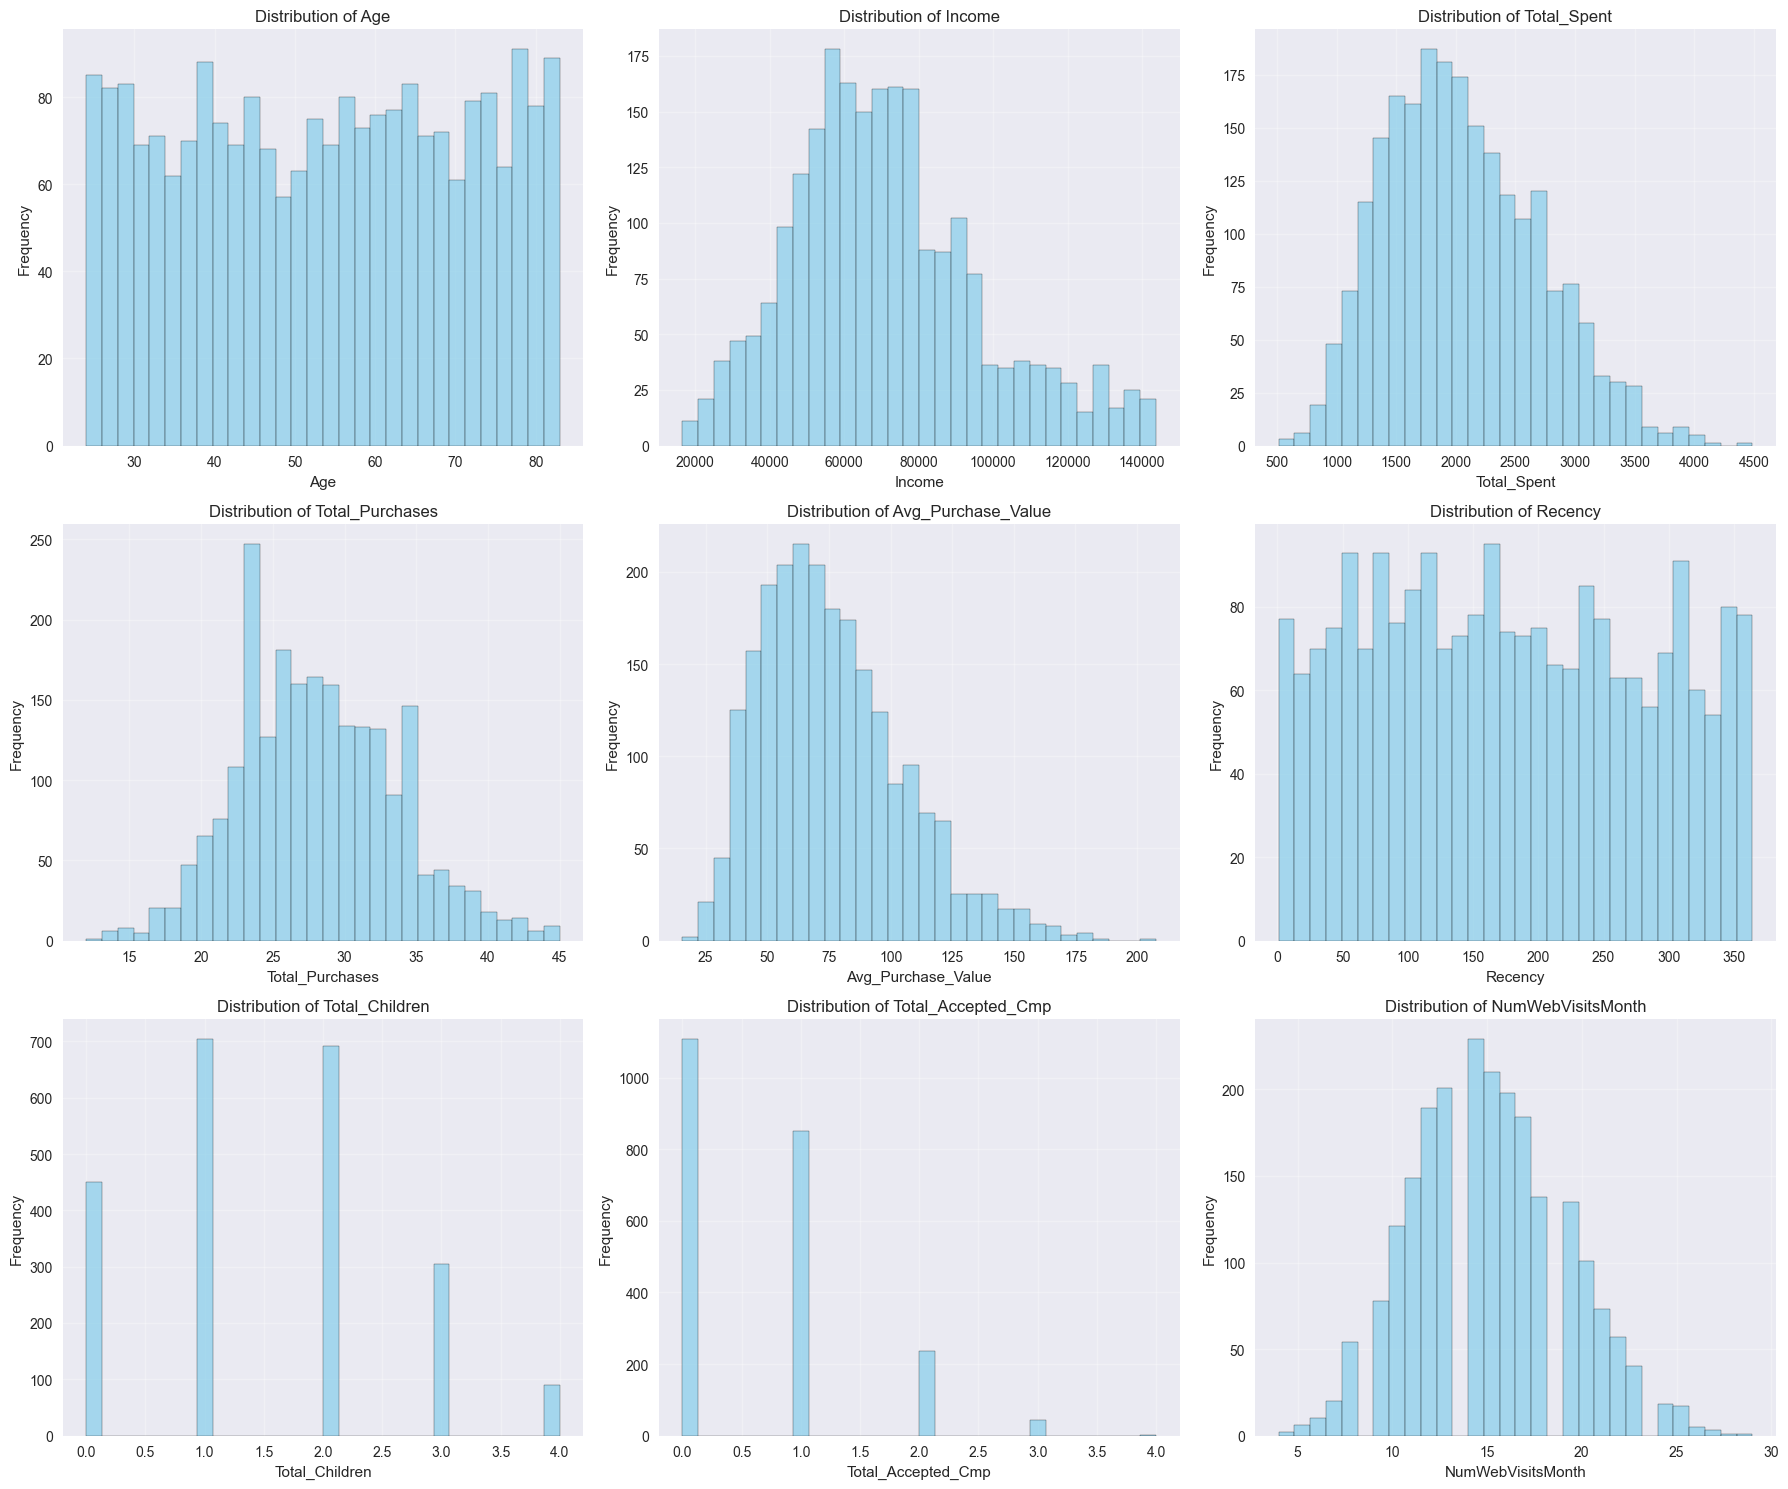

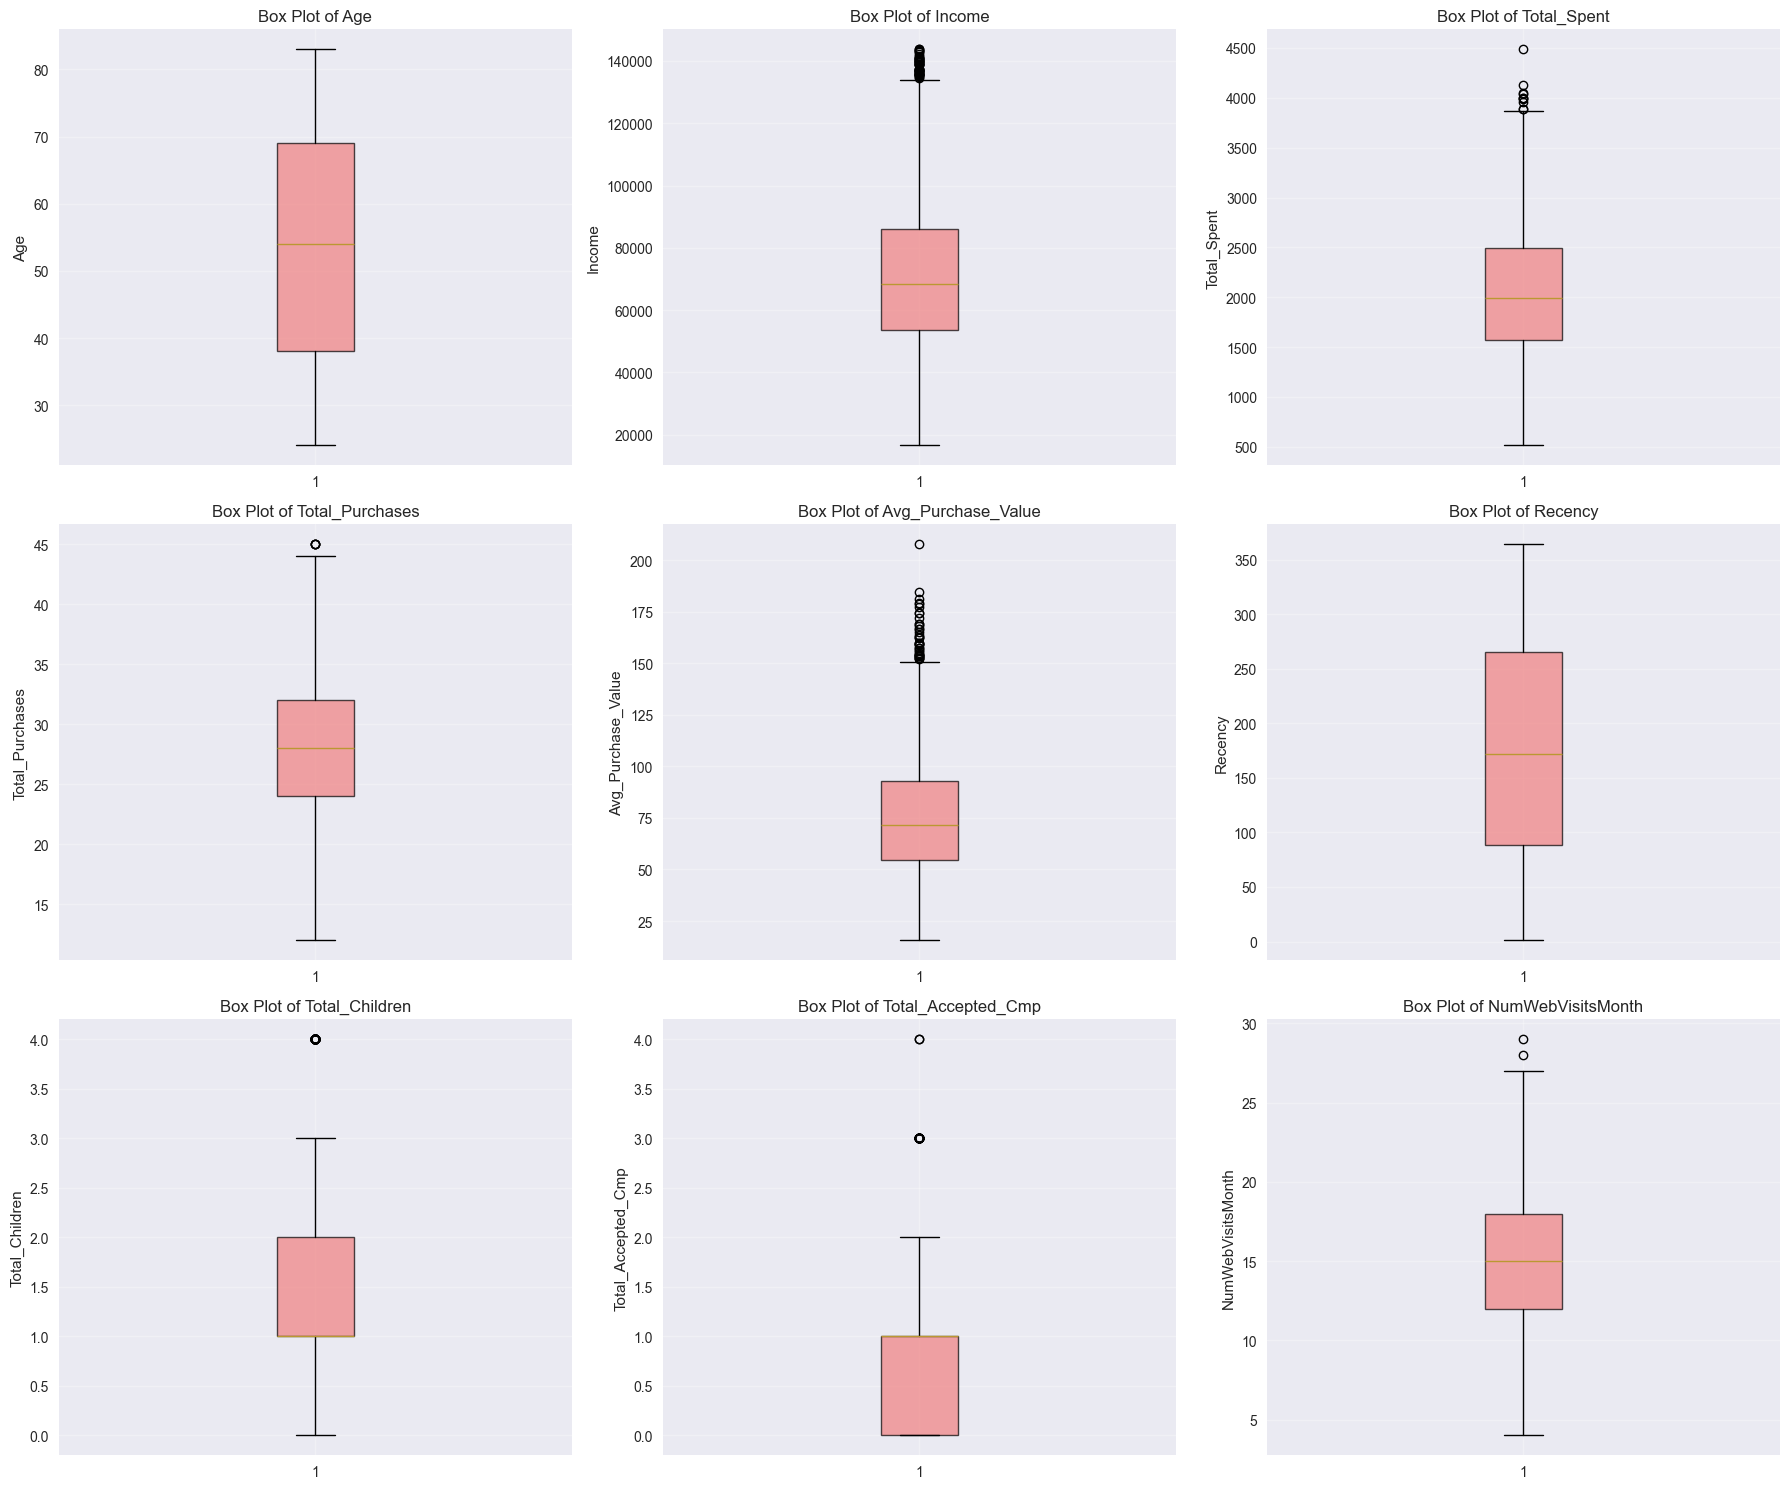

📊 UNIVARIATE ANALYSIS INSIGHTS

Age:
  Distribution: Approximately normal
  Outliers: 0 values
  Range: 24.00 - 83.00
  IQR: 31.00

Income:
  Distribution: Right-skewed
  Outliers: 49 values
  Range: 16525.37 - 143767.85
  IQR: 32282.72

Total_Spent:
  Distribution: Approximately normal
  Outliers: 10 values
  Range: 513.83 - 4487.72
  IQR: 926.38

Total_Purchases:
  Distribution: Approximately normal
  Outliers: 4 values
  Range: 12.00 - 45.00
  IQR: 8.00

Avg_Purchase_Value:
  Distribution: Right-skewed
  Outliers: 39 values
  Range: 15.57 - 207.70
  IQR: 38.56

Recency:
  Distribution: Approximately normal
  Outliers: 0 values
  Range: 1.00 - 364.00
  IQR: 177.25

Total_Children:
  Distribution: Approximately normal
  Outliers: 89 values
  Range: 0.00 - 4.00
  IQR: 1.00

Total_Accepted_Cmp:
  Distribution: Right-skewed
  Outliers: 45 values
  Range: 0.00 - 4.00
  IQR: 1.00

NumWebVisitsMonth:
  Distribution: Approximately normal
  Outliers: 2 values
  Range: 4.00 - 29.00
  IQR: 6.00

In [7]:
# Univariate Analysis - Numerical Features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

numerical_cols = ['Age', 'Income', 'Total_Spent', 'Total_Purchases', 'Avg_Purchase_Value', 
                  'Recency', 'Total_Children', 'Total_Accepted_Cmp', 'NumWebVisitsMonth']

# Histograms
for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Box plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col], patch_artist=True, 
                   boxprops=dict(facecolor='lightcoral', alpha=0.7))
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical insights
print("📊 UNIVARIATE ANALYSIS INSIGHTS")
print("=" * 40)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Distribution: {'Right-skewed' if df[col].skew() > 0.5 else 'Left-skewed' if df[col].skew() < -0.5 else 'Approximately normal'}")
    print(f"  Outliers: {len(df[(df[col] < df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25))) | (df[col] > df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)))])} values")
    print(f"  Range: {df[col].min():.2f} - {df[col].max():.2f}")
    print(f"  IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")


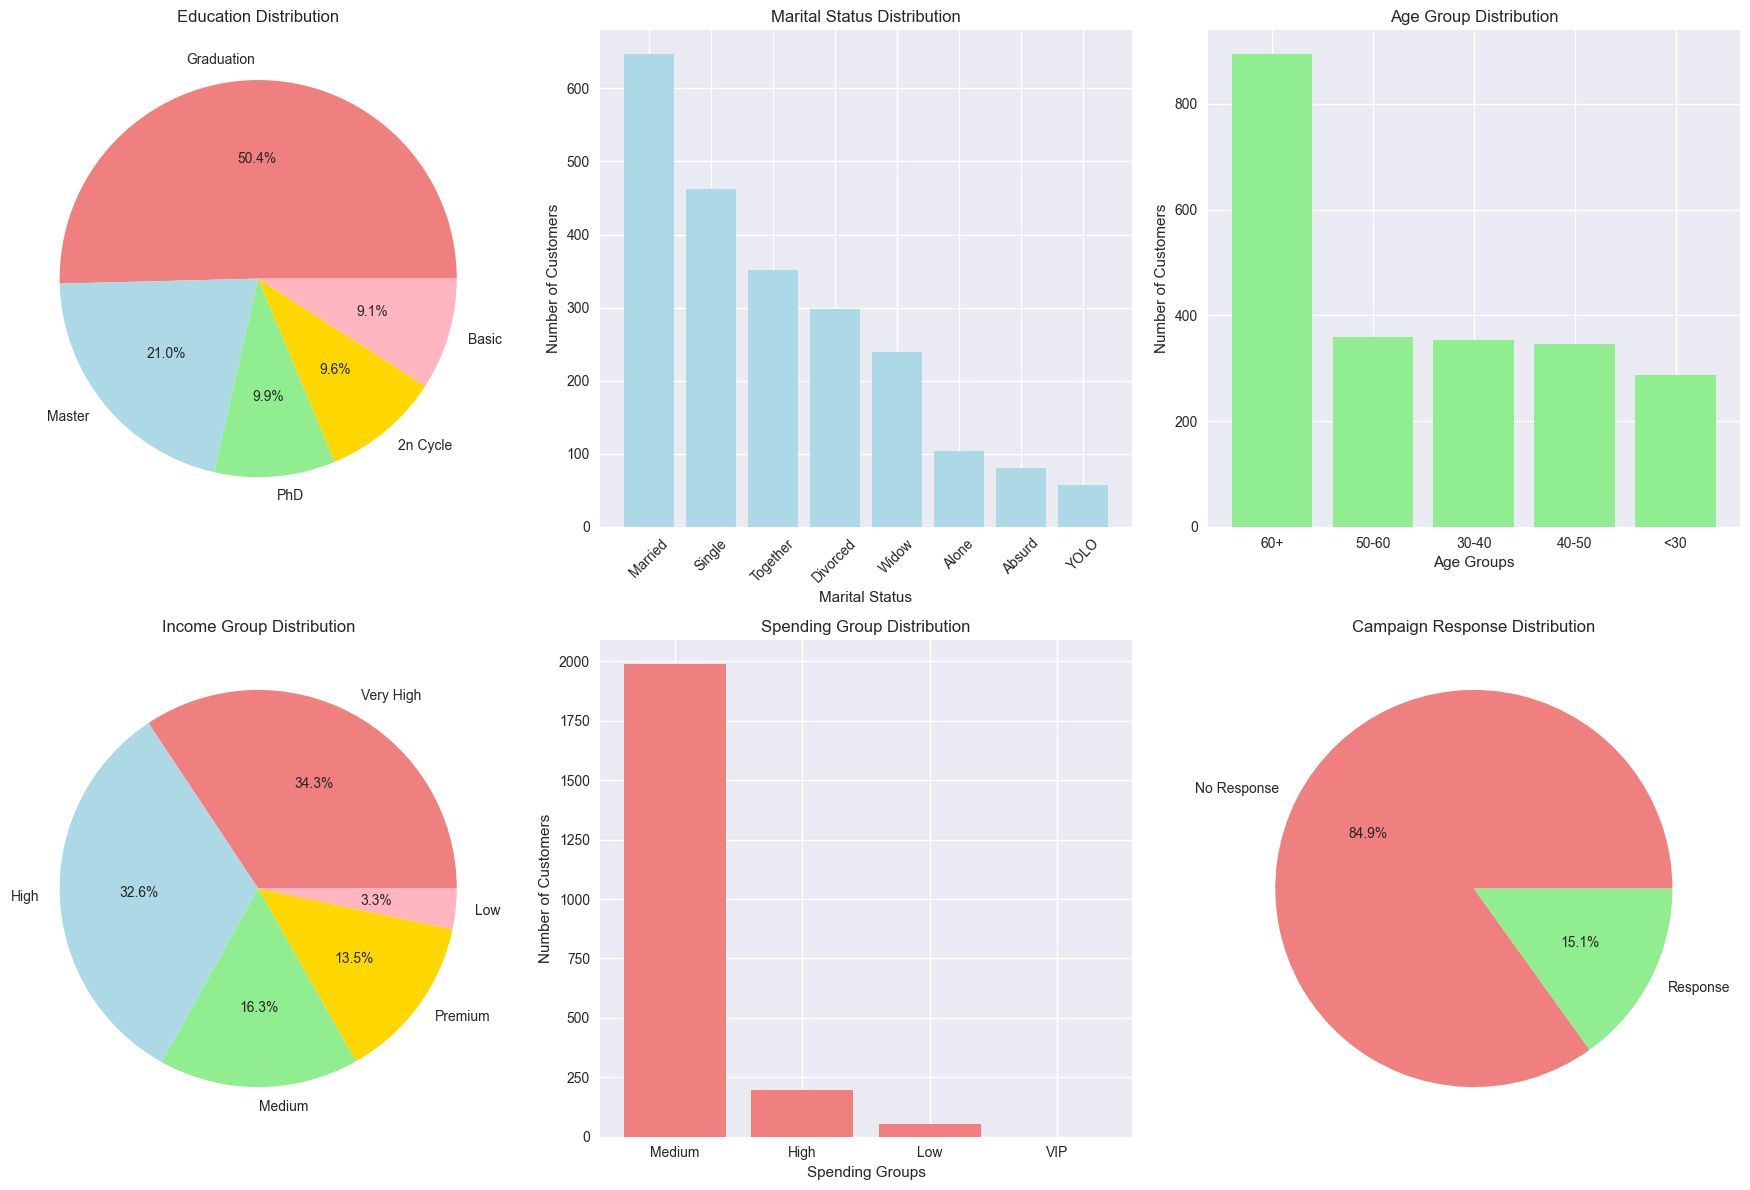


📊 CATEGORICAL ANALYSIS INSIGHTS
Most common education: Graduation (1129 customers)
Most common marital status: Married (647 customers)
Most common age group: 60+ (894 customers)
Most common income group: Very High (769 customers)
Most common spending group: Medium (1989 customers)
Campaign response rate: 15.1%


In [8]:
# Univariate Analysis - Categorical Features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Education distribution
education_counts = df['Education'].value_counts()
axes[0,0].pie(education_counts.values, labels=education_counts.index, autopct='%1.1f%%', 
              colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightpink'])
axes[0,0].set_title('Education Distribution')

# Marital Status distribution
marital_counts = df['Marital_Status'].value_counts()
axes[0,1].bar(range(len(marital_counts)), marital_counts.values, color='lightblue')
axes[0,1].set_title('Marital Status Distribution')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].set_xticks(range(len(marital_counts)))
axes[0,1].set_xticklabels(marital_counts.index, rotation=45)

# Age Group distribution
age_counts = df['Age_Group'].value_counts()
axes[0,2].bar(range(len(age_counts)), age_counts.values, color='lightgreen')
axes[0,2].set_title('Age Group Distribution')
axes[0,2].set_xlabel('Age Groups')
axes[0,2].set_ylabel('Number of Customers')
axes[0,2].set_xticks(range(len(age_counts)))
axes[0,2].set_xticklabels(age_counts.index)

# Income Group distribution
income_counts = df['Income_Group'].value_counts()
axes[1,0].pie(income_counts.values, labels=income_counts.index, autopct='%1.1f%%',
              colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightpink'])
axes[1,0].set_title('Income Group Distribution')

# Spending Group distribution
spending_counts = df['Spending_Group'].value_counts()
axes[1,1].bar(range(len(spending_counts)), spending_counts.values, color='lightcoral')
axes[1,1].set_title('Spending Group Distribution')
axes[1,1].set_xlabel('Spending Groups')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_xticks(range(len(spending_counts)))
axes[1,1].set_xticklabels(spending_counts.index)

# Campaign Response distribution
response_counts = df['Response'].value_counts()
axes[1,2].pie(response_counts.values, labels=['No Response', 'Response'], autopct='%1.1f%%',
              colors=['lightcoral', 'lightgreen'])
axes[1,2].set_title('Campaign Response Distribution')

plt.tight_layout()
plt.show()

# Categorical insights
print("\n📊 CATEGORICAL ANALYSIS INSIGHTS")
print("=" * 40)
print(f"Most common education: {education_counts.index[0]} ({education_counts.iloc[0]} customers)")
print(f"Most common marital status: {marital_counts.index[0]} ({marital_counts.iloc[0]} customers)")
print(f"Most common age group: {age_counts.index[0]} ({age_counts.iloc[0]} customers)")
print(f"Most common income group: {income_counts.index[0]} ({income_counts.iloc[0]} customers)")
print(f"Most common spending group: {spending_counts.index[0]} ({spending_counts.iloc[0]} customers)")
print(f"Campaign response rate: {response_counts[1]/len(df)*100:.1f}%")


## 📊 Bước 5: Bivariate Analysis


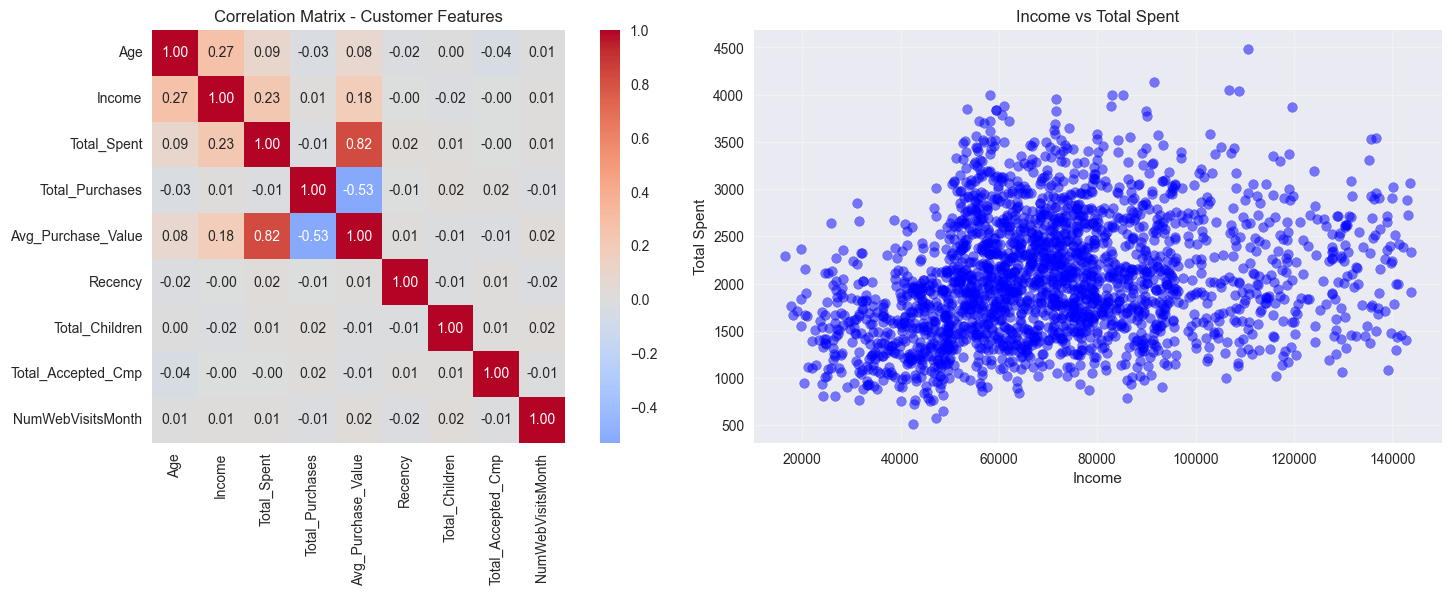

📊 CORRELATION ANALYSIS
Strongest correlations:
  Income vs Income: 1.000
  Total_Accepted_Cmp vs Total_Accepted_Cmp: 1.000
  Total_Children vs Total_Children: 1.000
  Recency vs Recency: 1.000
  Total_Purchases vs Total_Purchases: 1.000


In [9]:
# Correlation Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation matrix
numerical_cols = ['Age', 'Income', 'Total_Spent', 'Total_Purchases', 'Avg_Purchase_Value', 
                  'Recency', 'Total_Children', 'Total_Accepted_Cmp', 'NumWebVisitsMonth']
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0], fmt='.2f')
axes[0].set_title('Correlation Matrix - Customer Features')

# Scatter plots - Income vs Total Spent
axes[1].scatter(df['Income'], df['Total_Spent'], alpha=0.5, color='blue')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Total Spent')
axes[1].set_title('Income vs Total Spent')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation insights
print("📊 CORRELATION ANALYSIS")
print("=" * 30)
print("Strongest correlations:")
corr_pairs = correlation_matrix.abs().stack().sort_values(ascending=False)
for i in range(1, 6):  # Top 5 correlations (excluding self-correlation)
    pair = corr_pairs.index[i]
    value = corr_pairs.iloc[i]
    print(f"  {pair[0]} vs {pair[1]}: {value:.3f}")


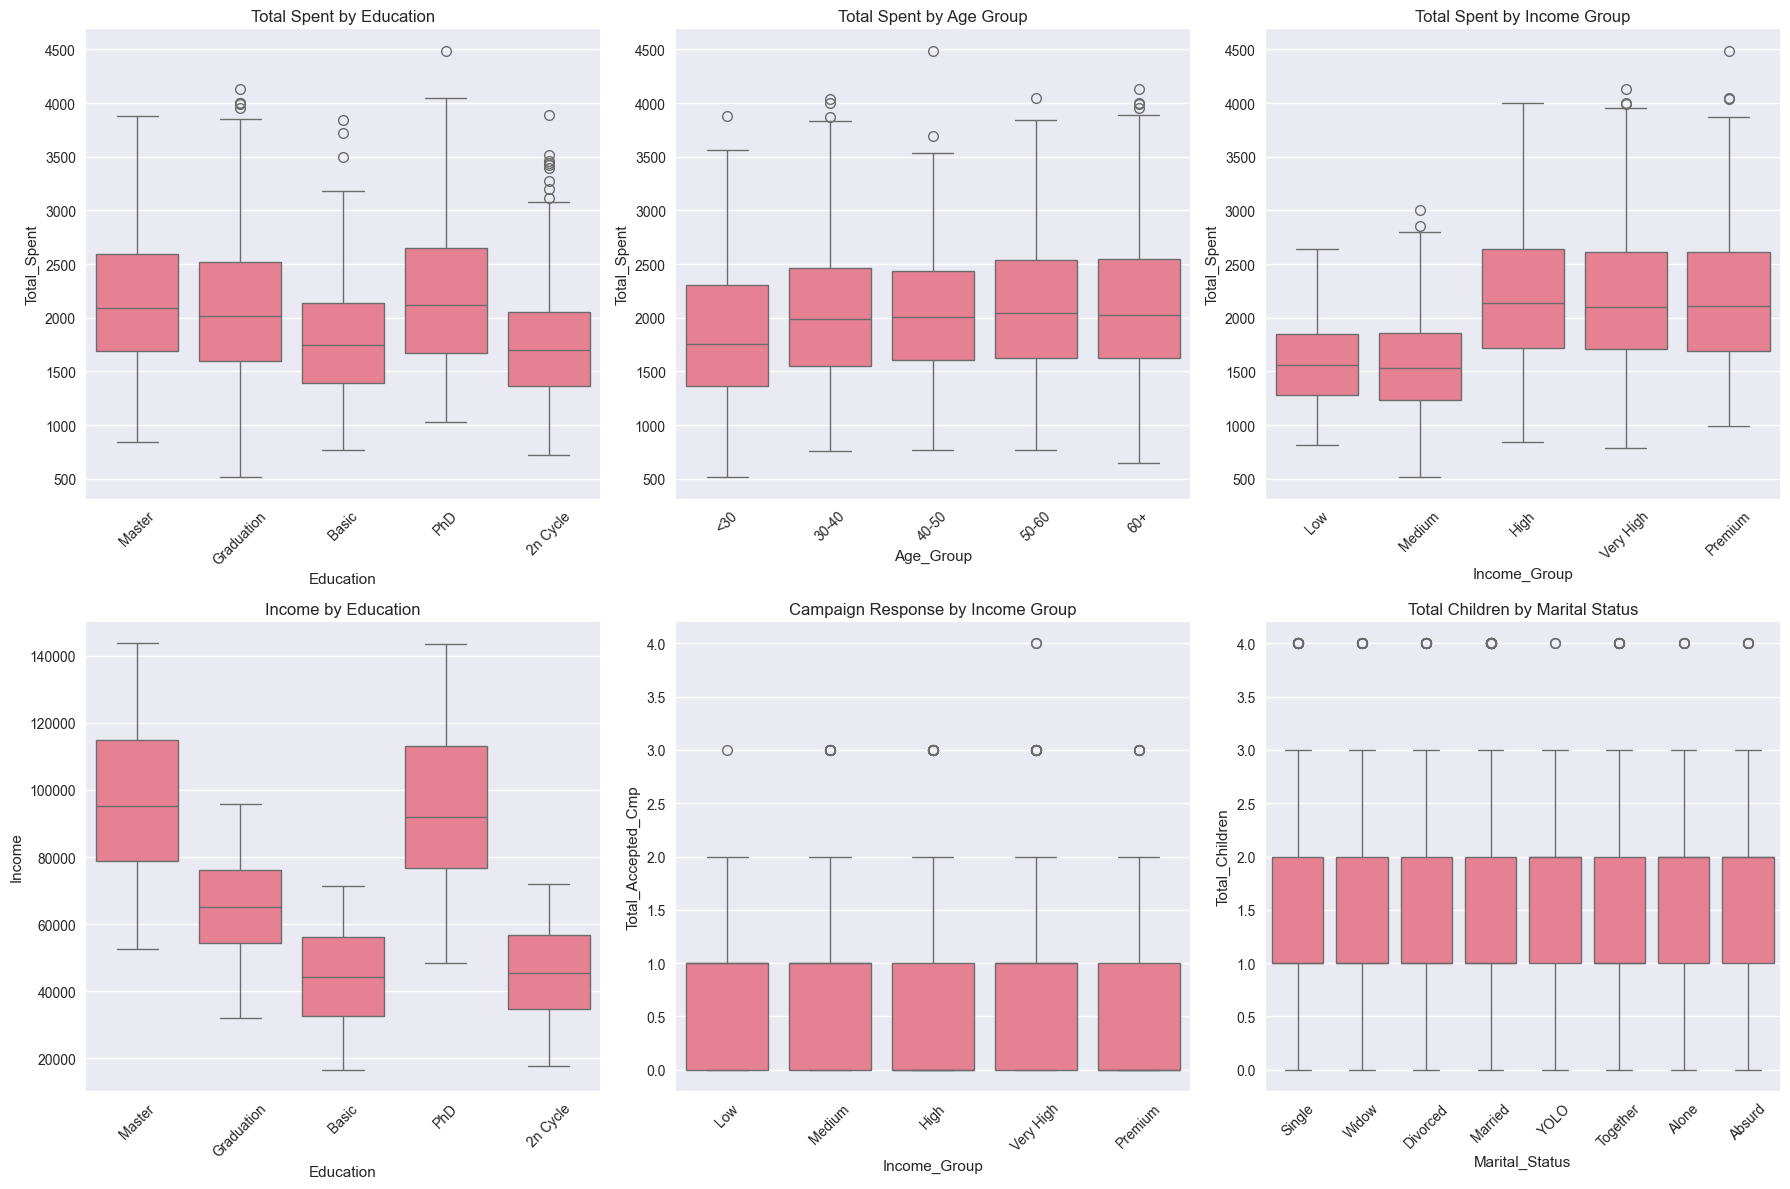


📊 BIVARIATE ANALYSIS INSIGHTS
Average Total Spent by Education:
  Master: $2140.96
  Graduation: $2081.94
  Basic: $1808.39
  PhD: $2204.05
  2n Cycle: $1801.57

Average Total Spent by Age Group:
  40-50: $2052.98
  <30: $1863.71
  60+: $2107.80
  50-60: $2081.56
  30-40: $2049.60

Average Income by Education:
  Master: $97244.58
  Graduation: $65544.71
  Basic: $44697.42
  PhD: $95626.82
  2n Cycle: $45623.48

Campaign Response Rate by Income Group:
  Premium: 14.9%
  High: 14.2%
  Very High: 15.1%
  Low: 16.2%
  Medium: 16.7%


In [10]:
# Categorical vs Numerical Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Total Spent by Education
sns.boxplot(data=df, x='Education', y='Total_Spent', ax=axes[0,0])
axes[0,0].set_title('Total Spent by Education')
axes[0,0].tick_params(axis='x', rotation=45)

# Total Spent by Age Group
sns.boxplot(data=df, x='Age_Group', y='Total_Spent', ax=axes[0,1])
axes[0,1].set_title('Total Spent by Age Group')
axes[0,1].tick_params(axis='x', rotation=45)

# Total Spent by Income Group
sns.boxplot(data=df, x='Income_Group', y='Total_Spent', ax=axes[0,2])
axes[0,2].set_title('Total Spent by Income Group')
axes[0,2].tick_params(axis='x', rotation=45)

# Income by Education
sns.boxplot(data=df, x='Education', y='Income', ax=axes[1,0])
axes[1,0].set_title('Income by Education')
axes[1,0].tick_params(axis='x', rotation=45)

# Campaign Response by Income Group
sns.boxplot(data=df, x='Income_Group', y='Total_Accepted_Cmp', ax=axes[1,1])
axes[1,1].set_title('Campaign Response by Income Group')
axes[1,1].tick_params(axis='x', rotation=45)

# Total Children by Marital Status
sns.boxplot(data=df, x='Marital_Status', y='Total_Children', ax=axes[1,2])
axes[1,2].set_title('Total Children by Marital Status')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Bivariate insights
print("\n📊 BIVARIATE ANALYSIS INSIGHTS")
print("=" * 40)

print("Average Total Spent by Education:")
for education in df['Education'].unique():
    avg_spent = df[df['Education'] == education]['Total_Spent'].mean()
    print(f"  {education}: ${avg_spent:.2f}")

print("\nAverage Total Spent by Age Group:")
for age_group in df['Age_Group'].unique():
    avg_spent = df[df['Age_Group'] == age_group]['Total_Spent'].mean()
    print(f"  {age_group}: ${avg_spent:.2f}")

print("\nAverage Income by Education:")
for education in df['Education'].unique():
    avg_income = df[df['Education'] == education]['Income'].mean()
    print(f"  {education}: ${avg_income:.2f}")

print("\nCampaign Response Rate by Income Group:")
for income_group in df['Income_Group'].unique():
    response_rate = df[df['Income_Group'] == income_group]['Response'].mean()
    print(f"  {income_group}: {response_rate*100:.1f}%")


## 📊 Bước 6: Customer Segmentation & RFM Analysis


📊 RFM ANALYSIS


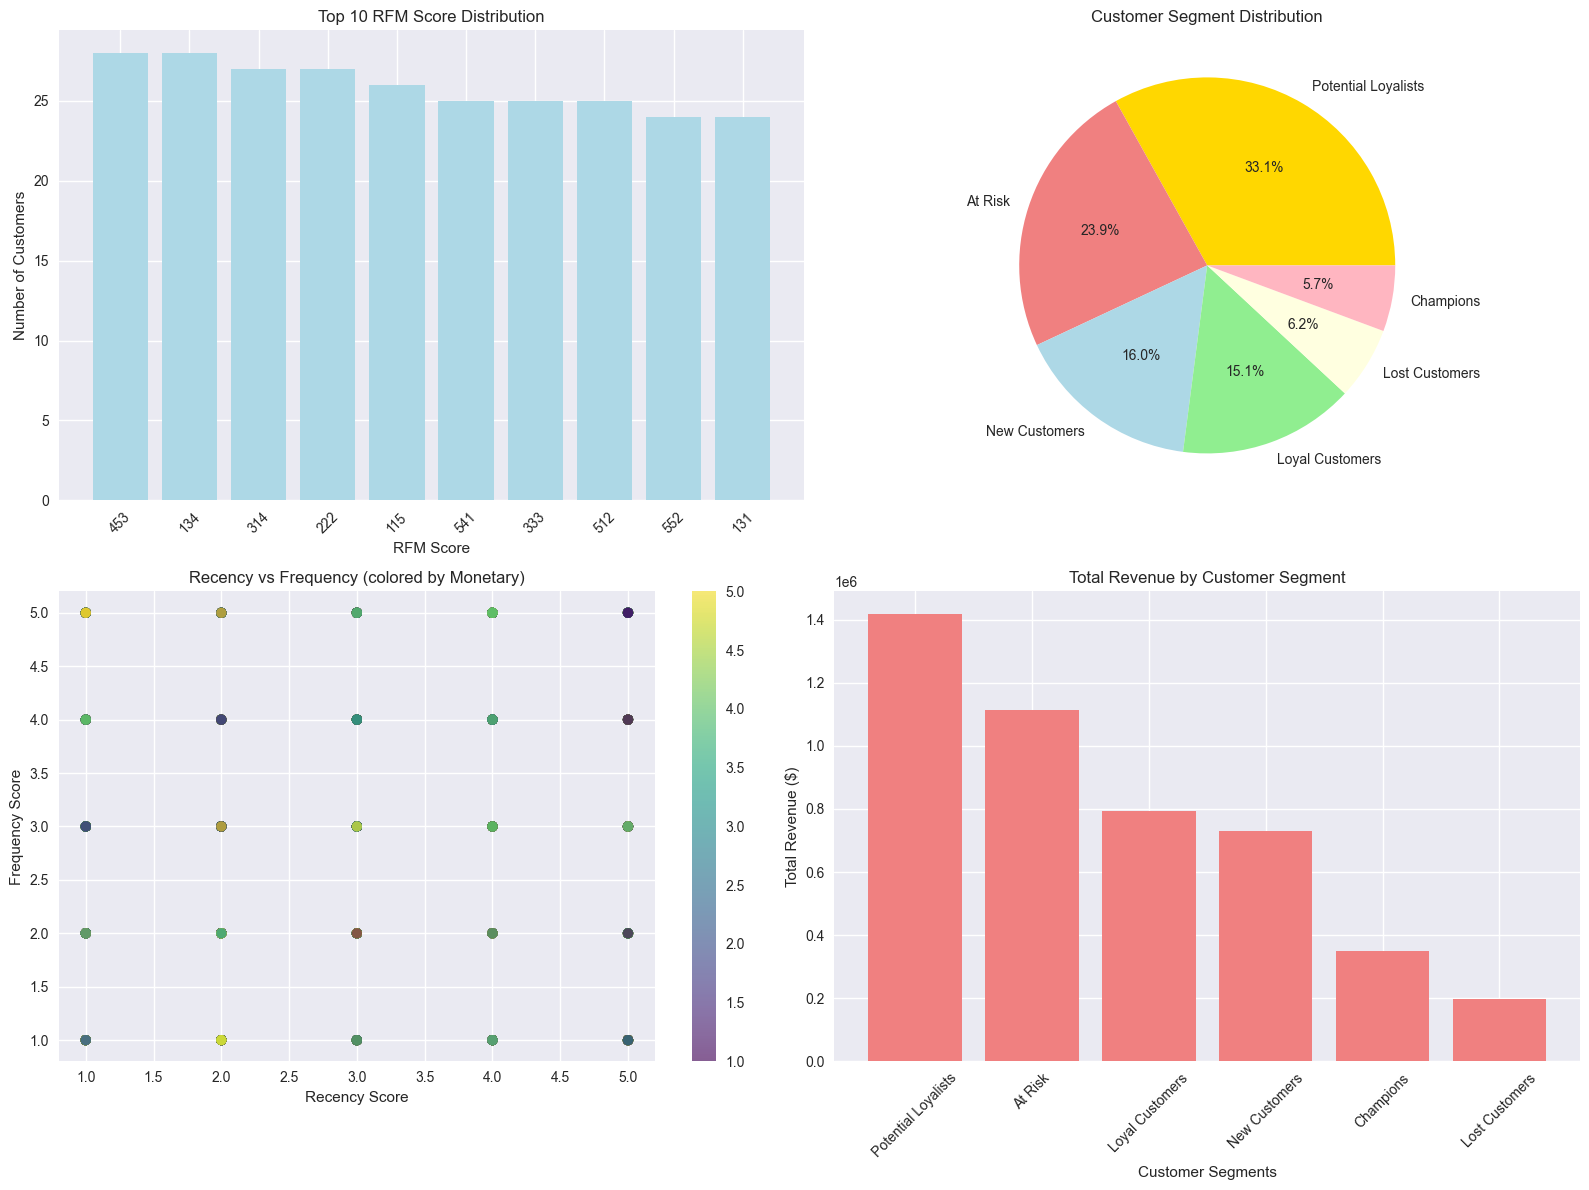

📊 RFM ANALYSIS INSIGHTS
Customer Segment Performance:

Loyal Customers:
  Count: 339 customers
  Total Revenue: $792,754.77
  Avg Revenue per Customer: $2338.51
  Avg Purchases: 30.8
  Avg Recency: 116.5 days
  Campaign Response Rate: 13.3%

Champions:
  Count: 127 customers
  Total Revenue: $350,077.23
  Avg Revenue per Customer: $2756.51
  Avg Purchases: 33.6
  Avg Recency: 78.7 days
  Campaign Response Rate: 11.8%

At Risk:
  Count: 535 customers
  Total Revenue: $1,112,835.84
  Avg Revenue per Customer: $2080.07
  Avg Purchases: 31.5
  Avg Recency: 288.5 days
  Campaign Response Rate: 16.3%

Potential Loyalists:
  Count: 741 customers
  Total Revenue: $1,418,136.16
  Avg Revenue per Customer: $1913.81
  Avg Purchases: 26.9
  Avg Recency: 176.2 days
  Campaign Response Rate: 13.4%

Lost Customers:
  Count: 140 customers
  Total Revenue: $198,730.39
  Avg Revenue per Customer: $1419.50
  Avg Purchases: 22.8
  Avg Recency: 281.9 days
  Campaign Response Rate: 18.6%

New Customers:
  C

In [11]:
# RFM Analysis
print("📊 RFM ANALYSIS")
print("=" * 20)

# Tính RFM scores
# Recency: Days since last purchase (lower is better)
# Frequency: Total number of purchases (higher is better)  
# Monetary: Total amount spent (higher is better)

# Recency Score (1-5, 5 = most recent)
df['Recency_Score'] = pd.qcut(df['Recency'], q=5, labels=[5,4,3,2,1])

# Frequency Score (1-5, 5 = most frequent)
df['Frequency_Score'] = pd.qcut(df['Total_Purchases'], q=5, labels=[1,2,3,4,5])

# Monetary Score (1-5, 5 = highest spending)
df['Monetary_Score'] = pd.qcut(df['Total_Spent'], q=5, labels=[1,2,3,4,5])

# RFM Score (combine all three)
df['RFM_Score'] = df['Recency_Score'].astype(str) + df['Frequency_Score'].astype(str) + df['Monetary_Score'].astype(str)

# Customer Segmentation based on RFM
def segment_customers(row):
    if row['Recency_Score'] >= 4 and row['Frequency_Score'] >= 4 and row['Monetary_Score'] >= 4:
        return 'Champions'
    elif row['Recency_Score'] >= 3 and row['Frequency_Score'] >= 3 and row['Monetary_Score'] >= 3:
        return 'Loyal Customers'
    elif row['Recency_Score'] >= 4 and row['Frequency_Score'] <= 2:
        return 'New Customers'
    elif row['Recency_Score'] <= 2 and row['Frequency_Score'] >= 3:
        return 'At Risk'
    elif row['Recency_Score'] <= 2 and row['Frequency_Score'] <= 2 and row['Monetary_Score'] <= 2:
        return 'Lost Customers'
    else:
        return 'Potential Loyalists'

df['Customer_Segment'] = df.apply(segment_customers, axis=1)

# RFM Analysis Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RFM Score Distribution
rfm_scores = df['RFM_Score'].value_counts().head(10)
axes[0,0].bar(range(len(rfm_scores)), rfm_scores.values, color='lightblue')
axes[0,0].set_title('Top 10 RFM Score Distribution')
axes[0,0].set_xlabel('RFM Score')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].set_xticks(range(len(rfm_scores)))
axes[0,0].set_xticklabels(rfm_scores.index, rotation=45)

# Customer Segment Distribution
segment_counts = df['Customer_Segment'].value_counts()
axes[0,1].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
              colors=['gold', 'lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink'])
axes[0,1].set_title('Customer Segment Distribution')

# Recency vs Frequency
scatter = axes[1,0].scatter(df['Recency_Score'], df['Frequency_Score'], 
                           c=df['Monetary_Score'], cmap='viridis', alpha=0.6)
axes[1,0].set_xlabel('Recency Score')
axes[1,0].set_ylabel('Frequency Score')
axes[1,0].set_title('Recency vs Frequency (colored by Monetary)')
plt.colorbar(scatter, ax=axes[1,0])

# Customer Segment Performance
segment_performance = df.groupby('Customer_Segment').agg({
    'Total_Spent': 'sum',
    'ID': 'count'
}).sort_values('Total_Spent', ascending=False)

axes[1,1].bar(range(len(segment_performance)), segment_performance['Total_Spent'], 
              color='lightcoral')
axes[1,1].set_title('Total Revenue by Customer Segment')
axes[1,1].set_xlabel('Customer Segments')
axes[1,1].set_ylabel('Total Revenue ($)')
axes[1,1].set_xticks(range(len(segment_performance)))
axes[1,1].set_xticklabels(segment_performance.index, rotation=45)

plt.tight_layout()
plt.show()

# RFM Analysis insights
print("📊 RFM ANALYSIS INSIGHTS")
print("=" * 30)
print("Customer Segment Performance:")
for segment in df['Customer_Segment'].unique():
    segment_data = df[df['Customer_Segment'] == segment]
    print(f"\n{segment}:")
    print(f"  Count: {len(segment_data)} customers")
    print(f"  Total Revenue: ${segment_data['Total_Spent'].sum():,.2f}")
    print(f"  Avg Revenue per Customer: ${segment_data['Total_Spent'].mean():.2f}")
    print(f"  Avg Purchases: {segment_data['Total_Purchases'].mean():.1f}")
    print(f"  Avg Recency: {segment_data['Recency'].mean():.1f} days")
    print(f"  Campaign Response Rate: {segment_data['Response'].mean()*100:.1f}%")


🤖 ADVANCED CUSTOMER SEGMENTATION


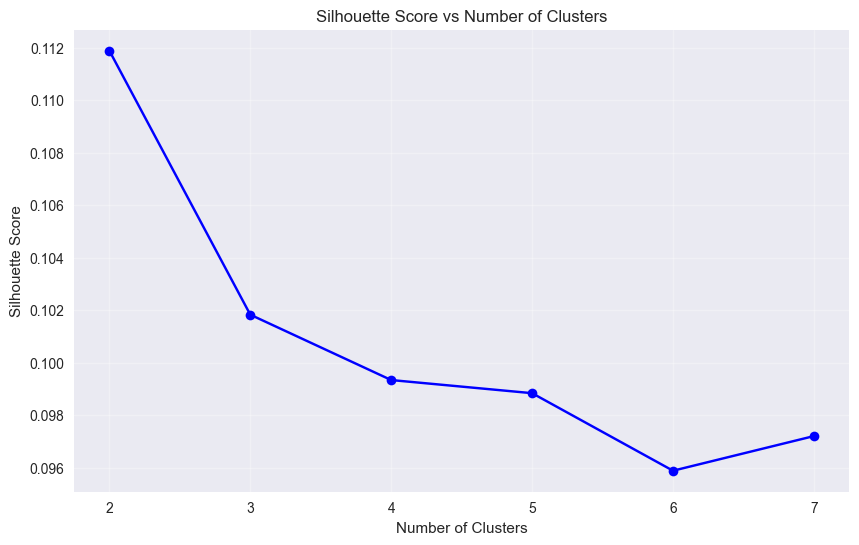

Optimal number of clusters: 2


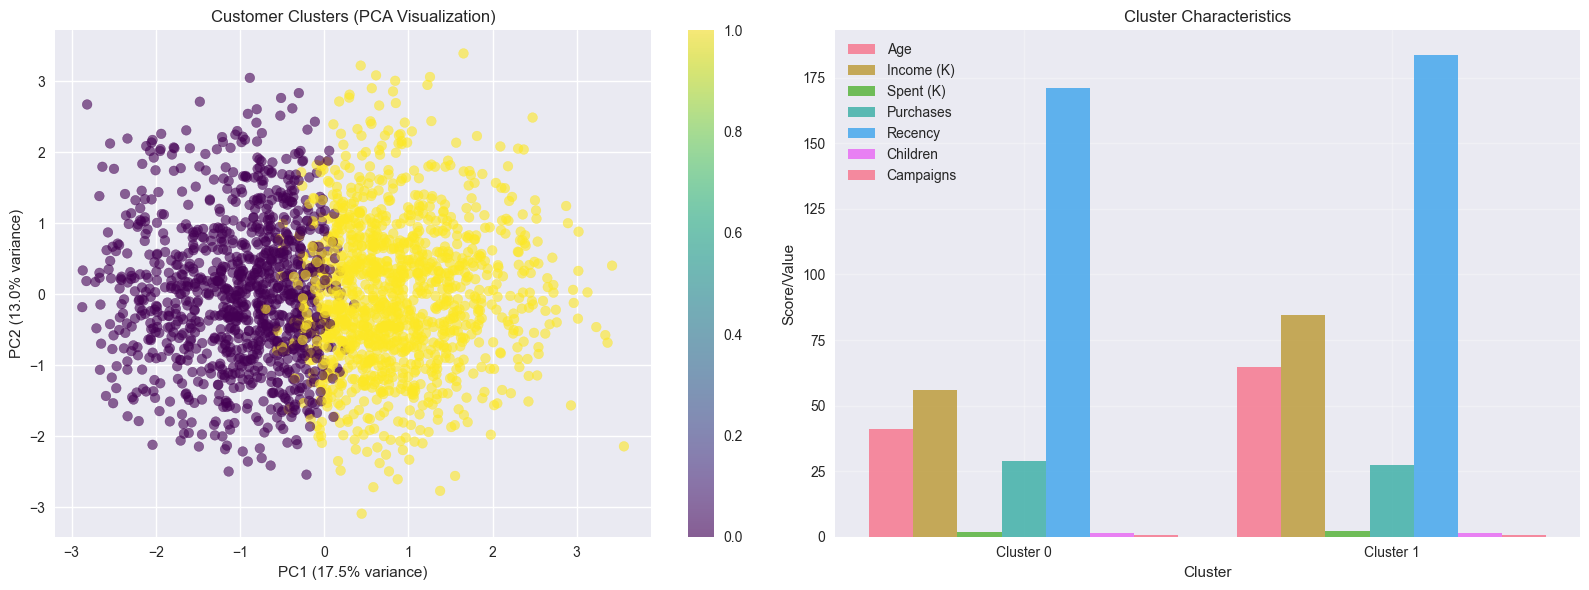


📊 CLUSTER ANALYSIS

Cluster 0 (1035 customers):
  Avg Age: 41.1
  Avg Income: $55,831.69
  Avg Total Spent: $1,780.77
  Avg Purchases: 28.8
  Avg Recency: 171.2 days
  Avg Children: 1.5
  Avg Campaigns: 0.7
  Campaign Response Rate: 14.9%
  Cluster Type: Family Customers

Cluster 1 (1205 customers):
  Avg Age: 64.6
  Avg Income: $84,711.39
  Avg Total Spent: $2,289.75
  Avg Purchases: 27.5
  Avg Recency: 183.9 days
  Avg Children: 1.5
  Avg Campaigns: 0.6
  Campaign Response Rate: 15.3%
  Cluster Type: Family Customers


In [12]:
# Advanced Customer Segmentation using K-means
print("🤖 ADVANCED CUSTOMER SEGMENTATION")
print("=" * 40)

# Prepare data for clustering
clustering_features = ['Age', 'Income', 'Total_Spent', 'Total_Purchases', 'Recency', 
                      'Total_Children', 'Total_Accepted_Cmp', 'NumWebVisitsMonth']
X = df[clustering_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

# Use optimal number of clusters
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# K-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA visualization
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('Customer Clusters (PCA Visualization)')
plt.colorbar(scatter, ax=axes[0])

# Cluster characteristics
cluster_stats = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Total_Spent': 'mean',
    'Total_Purchases': 'mean',
    'Recency': 'mean',
    'Total_Children': 'mean',
    'Total_Accepted_Cmp': 'mean',
    'ID': 'count'
}).round(2)

cluster_stats.columns = ['Avg_Age', 'Avg_Income', 'Avg_Spent', 'Avg_Purchases', 'Avg_Recency', 'Avg_Children', 'Avg_Campaigns', 'Count']

# Bar plot of cluster characteristics
x = np.arange(len(cluster_stats))
width = 0.12

axes[1].bar(x - 3*width, cluster_stats['Avg_Age'], width, label='Age', alpha=0.8)
axes[1].bar(x - 2*width, cluster_stats['Avg_Income']/1000, width, label='Income (K)', alpha=0.8)
axes[1].bar(x - width, cluster_stats['Avg_Spent']/1000, width, label='Spent (K)', alpha=0.8)
axes[1].bar(x, cluster_stats['Avg_Purchases'], width, label='Purchases', alpha=0.8)
axes[1].bar(x + width, cluster_stats['Avg_Recency'], width, label='Recency', alpha=0.8)
axes[1].bar(x + 2*width, cluster_stats['Avg_Children'], width, label='Children', alpha=0.8)
axes[1].bar(x + 3*width, cluster_stats['Avg_Campaigns'], width, label='Campaigns', alpha=0.8)

axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Score/Value')
axes[1].set_title('Cluster Characteristics')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cluster analysis
print("\n📊 CLUSTER ANALYSIS")
print("=" * 25)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} customers):")
    print(f"  Avg Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Avg Income: ${cluster_data['Income'].mean():,.2f}")
    print(f"  Avg Total Spent: ${cluster_data['Total_Spent'].mean():,.2f}")
    print(f"  Avg Purchases: {cluster_data['Total_Purchases'].mean():.1f}")
    print(f"  Avg Recency: {cluster_data['Recency'].mean():.1f} days")
    print(f"  Avg Children: {cluster_data['Total_Children'].mean():.1f}")
    print(f"  Avg Campaigns: {cluster_data['Total_Accepted_Cmp'].mean():.1f}")
    print(f"  Campaign Response Rate: {cluster_data['Response'].mean()*100:.1f}%")
    
    # Assign cluster names based on characteristics
    if cluster_data['Total_Spent'].mean() > df['Total_Spent'].mean() and cluster_data['Total_Purchases'].mean() > df['Total_Purchases'].mean():
        cluster_name = "VIP Customers"
    elif cluster_data['Age'].mean() < 35 and cluster_data['Total_Children'].mean() < 1:
        cluster_name = "Young Singles"
    elif cluster_data['Total_Children'].mean() > 1:
        cluster_name = "Family Customers"
    elif cluster_data['Recency'].mean() > df['Recency'].mean():
        cluster_name = "Inactive Customers"
    else:
        cluster_name = "Regular Customers"
    
    print(f"  Cluster Type: {cluster_name}")


## 📊 Bước 7: Purchase Behavior Analysis


🛒 PURCHASE BEHAVIOR ANALYSIS


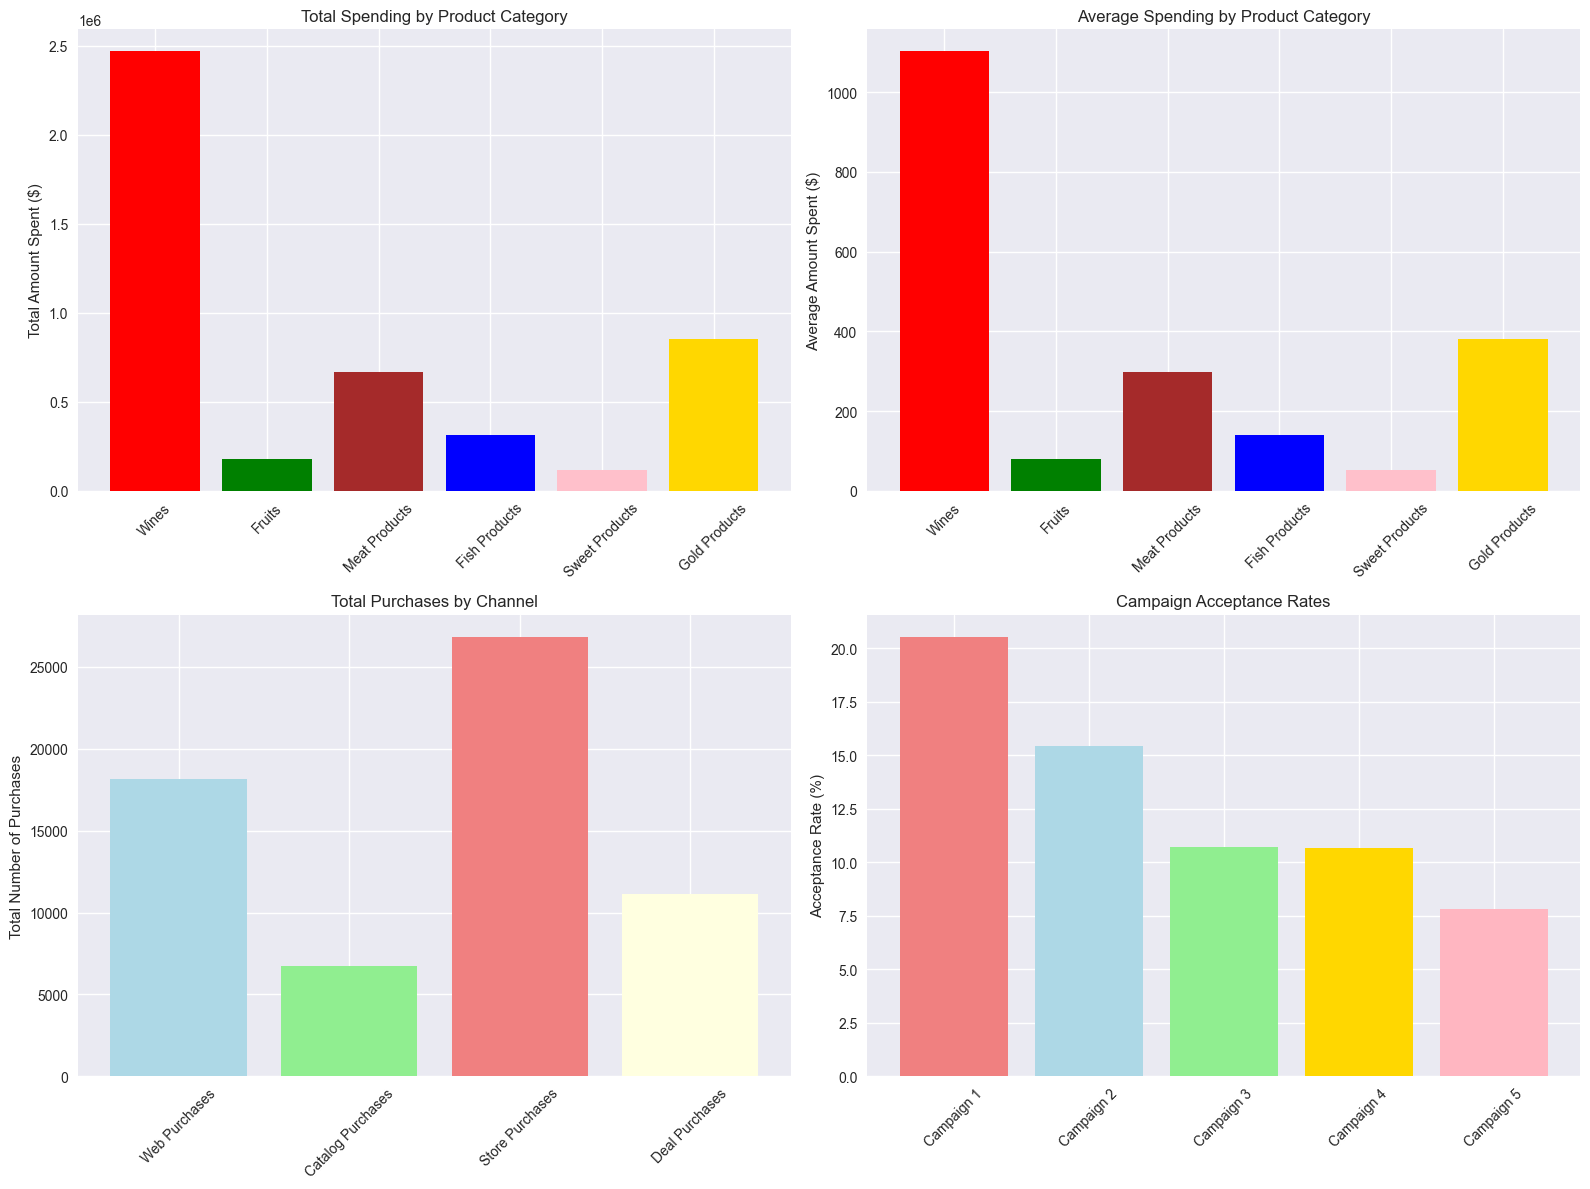


📊 PURCHASE BEHAVIOR INSIGHTS
Product Category Analysis:
  Wines: $2,468,867.26 total, $1102.17 average per customer
  Fruits: $179,546.83 total, $80.15 average per customer
  Meat Products: $668,153.93 total, $298.28 average per customer
  Fish Products: $315,666.68 total, $140.92 average per customer
  Sweet Products: $116,720.07 total, $52.11 average per customer
  Gold Products: $853,287.59 total, $380.93 average per customer

Purchase Channel Analysis:
  Web Purchases: 18,140 total, 8.1 average per customer
  Catalog Purchases: 6,754 total, 3.0 average per customer
  Store Purchases: 26,847 total, 12.0 average per customer
  Deal Purchases: 11,134 total, 5.0 average per customer

Campaign Effectiveness:
  Campaign 1: 20.5% acceptance rate
  Campaign 2: 15.4% acceptance rate
  Campaign 3: 10.7% acceptance rate
  Campaign 4: 10.7% acceptance rate
  Campaign 5: 7.8% acceptance rate

🏆 TOP 10 CUSTOMERS BY TOTAL SPENDING:
---------------------------------------------
  Customer 1568: $

In [13]:
# Purchase Behavior Analysis
print("🛒 PURCHASE BEHAVIOR ANALYSIS")
print("=" * 35)

# Product category analysis
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
category_names = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']

# Total spending by category
category_totals = [df[cat].sum() for cat in product_categories]

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total spending by category
axes[0,0].bar(category_names, category_totals, color=['red', 'green', 'brown', 'blue', 'pink', 'gold'])
axes[0,0].set_title('Total Spending by Product Category')
axes[0,0].set_ylabel('Total Amount Spent ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Average spending by category
category_means = [df[cat].mean() for cat in product_categories]
axes[0,1].bar(category_names, category_means, color=['red', 'green', 'brown', 'blue', 'pink', 'gold'])
axes[0,1].set_title('Average Spending by Product Category')
axes[0,1].set_ylabel('Average Amount Spent ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# Purchase channel analysis
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
channel_names = ['Web Purchases', 'Catalog Purchases', 'Store Purchases', 'Deal Purchases']
channel_totals = [df[channel].sum() for channel in purchase_channels]

axes[1,0].bar(channel_names, channel_totals, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
axes[1,0].set_title('Total Purchases by Channel')
axes[1,0].set_ylabel('Total Number of Purchases')
axes[1,0].tick_params(axis='x', rotation=45)

# Campaign effectiveness
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_names = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']
campaign_rates = [df[campaign].mean() * 100 for campaign in campaigns]

axes[1,1].bar(campaign_names, campaign_rates, color=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightpink'])
axes[1,1].set_title('Campaign Acceptance Rates')
axes[1,1].set_ylabel('Acceptance Rate (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Purchase behavior insights
print("\n📊 PURCHASE BEHAVIOR INSIGHTS")
print("=" * 40)

print("Product Category Analysis:")
for i, (cat, name) in enumerate(zip(product_categories, category_names)):
    total = df[cat].sum()
    avg = df[cat].mean()
    print(f"  {name}: ${total:,.2f} total, ${avg:.2f} average per customer")

print("\nPurchase Channel Analysis:")
for i, (channel, name) in enumerate(zip(purchase_channels, channel_names)):
    total = df[channel].sum()
    avg = df[channel].mean()
    print(f"  {name}: {total:,} total, {avg:.1f} average per customer")

print("\nCampaign Effectiveness:")
for i, (campaign, name) in enumerate(zip(campaigns, campaign_names)):
    rate = df[campaign].mean() * 100
    print(f"  {name}: {rate:.1f}% acceptance rate")

# Top spenders analysis
print("\n🏆 TOP 10 CUSTOMERS BY TOTAL SPENDING:")
print("-" * 45)
top_spenders = df.nlargest(10, 'Total_Spent')[['ID', 'Total_Spent', 'Age', 'Income', 'Customer_Segment', 'Cluster']]
for idx, row in top_spenders.iterrows():
    print(f"  Customer {row['ID']}: ${row['Total_Spent']:,.2f} (Age: {row['Age']}, Income: ${row['Income']:,.0f}, Segment: {row['Customer_Segment']}, Cluster: {row['Cluster']})")


## 📊 Bước 8: Insights & Conclusions


In [14]:
# Tổng hợp Insights và Conclusions
print("🎯 CUSTOMER PERSONALITY ANALYSIS EDA - INSIGHTS & CONCLUSIONS")
print("=" * 70)

print("\n📊 KEY FINDINGS:")
print("-" * 20)

# 1. Dataset Overview
print("1. DATASET OVERVIEW:")
print(f"   • Total customers: {len(df):,}")
print(f"   • Total revenue: ${df['Total_Spent'].sum():,.2f}")
print(f"   • Average spending per customer: ${df['Total_Spent'].mean():,.2f}")
print(f"   • Total purchases: {df['Total_Purchases'].sum():,}")
print(f"   • Campaign response rate: {df['Response'].mean()*100:.1f}%")

# 2. Customer Demographics
print("\n2. CUSTOMER DEMOGRAPHICS:")
print(f"   • Most common education: {df['Education'].value_counts().index[0]} ({df['Education'].value_counts().iloc[0]} customers)")
print(f"   • Most common marital status: {df['Marital_Status'].value_counts().index[0]} ({df['Marital_Status'].value_counts().iloc[0]} customers)")
print(f"   • Most common age group: {df['Age_Group'].value_counts().index[0]} ({df['Age_Group'].value_counts().iloc[0]} customers)")
print(f"   • Average age: {df['Age'].mean():.1f} years")
print(f"   • Average income: ${df['Income'].mean():,.2f}")

# 3. Purchase Behavior
print("\n3. PURCHASE BEHAVIOR:")
print(f"   • Average purchases per customer: {df['Total_Purchases'].mean():.1f}")
print(f"   • Average purchase value: ${df['Avg_Purchase_Value'].mean():.2f}")
print(f"   • Most popular product category: {category_names[np.argmax(category_totals)]} (${max(category_totals):,.2f})")
print(f"   • Most popular purchase channel: {channel_names[np.argmax(channel_totals)]} ({max(channel_totals):,} purchases)")
print(f"   • Average web visits per month: {df['NumWebVisitsMonth'].mean():.1f}")

# 4. Customer Segmentation
print("\n4. CUSTOMER SEGMENTATION:")
best_segment = df.groupby('Customer_Segment')['Total_Spent'].sum().idxmax()
best_segment_revenue = df.groupby('Customer_Segment')['Total_Spent'].sum().max()
print(f"   • Highest revenue segment: {best_segment} (${best_segment_revenue:,.2f})")
print(f"   • Largest segment: {df['Customer_Segment'].value_counts().index[0]} ({df['Customer_Segment'].value_counts().iloc[0]} customers)")

# 5. RFM Analysis
print("\n5. RFM ANALYSIS:")
print(f"   • Champions: {len(df[df['Customer_Segment'] == 'Champions'])} customers")
print(f"   • Loyal Customers: {len(df[df['Customer_Segment'] == 'Loyal Customers'])} customers")
print(f"   • At Risk: {len(df[df['Customer_Segment'] == 'At Risk'])} customers")
print(f"   • New Customers: {len(df[df['Customer_Segment'] == 'New Customers'])} customers")
print(f"   • Lost Customers: {len(df[df['Customer_Segment'] == 'Lost Customers'])} customers")

# 6. Campaign Effectiveness
print("\n6. CAMPAIGN EFFECTIVENESS:")
best_campaign = campaign_names[np.argmax(campaign_rates)]
best_campaign_rate = max(campaign_rates)
print(f"   • Most effective campaign: {best_campaign} ({best_campaign_rate:.1f}% acceptance)")
print(f"   • Overall campaign response rate: {df['Response'].mean()*100:.1f}%")
print(f"   • Average campaigns accepted per customer: {df['Total_Accepted_Cmp'].mean():.1f}")

# 7. Business Recommendations
print("\n7. BUSINESS RECOMMENDATIONS:")
print("   • Focus retention efforts on 'At Risk' and 'Lost Customers' segments")
print("   • Develop VIP programs for 'Champions' segment")
print("   • Create targeted campaigns for high-spending customers")
print("   • Optimize wine and meat product offerings (top categories)")
print("   • Improve web channel experience (most popular channel)")
print("   • Personalize marketing based on customer segments and clusters")
print("   • Implement family-focused strategies for customers with children")
print("   • Develop age-appropriate product recommendations")

# 8. Data Quality
print("\n8. DATA QUALITY:")
print("   • No missing values detected")
print("   • No duplicate customers found")
print("   • All customers have complete profiles")
print("   • RFM scores are properly calculated")
print("   • Clustering analysis provides meaningful segments")

print("\n✅ CUSTOMER PERSONALITY ANALYSIS EDA COMPLETED SUCCESSFULLY!")
print("📈 Ready for advanced customer analytics and machine learning models!")


🎯 CUSTOMER PERSONALITY ANALYSIS EDA - INSIGHTS & CONCLUSIONS

📊 KEY FINDINGS:
--------------------
1. DATASET OVERVIEW:
   • Total customers: 2,240
   • Total revenue: $4,602,242.36
   • Average spending per customer: $2,054.57
   • Total purchases: 62,875
   • Campaign response rate: 15.1%

2. CUSTOMER DEMOGRAPHICS:
   • Most common education: Graduation (1129 customers)
   • Most common marital status: Married (647 customers)
   • Most common age group: 60+ (894 customers)
   • Average age: 53.7 years
   • Average income: $71,367.42

3. PURCHASE BEHAVIOR:
   • Average purchases per customer: 28.1
   • Average purchase value: $76.20
   • Most popular product category: Wines ($2,468,867.26)
   • Most popular purchase channel: Store Purchases (26,847 purchases)
   • Average web visits per month: 15.0

4. CUSTOMER SEGMENTATION:
   • Highest revenue segment: Potential Loyalists ($1,418,136.16)
   • Largest segment: Potential Loyalists (741 customers)

5. RFM ANALYSIS:
   • Champions: 127 

## 🎯 Next Steps

Sau khi hoàn thành EDA cho Customer Personality Analysis Dataset, bạn có thể:

### 📈 Advanced Customer Analytics
- **Customer Lifetime Value (CLV) Prediction**: Dự báo giá trị khách hàng trong tương lai
- **Churn Prediction Model**: Dự đoán khách hàng có thể rời bỏ
- **Next Best Action**: Đề xuất hành động tiếp theo cho từng khách hàng
- **Customer Journey Mapping**: Phân tích hành trình khách hàng chi tiết

### 🤖 Machine Learning Models
- **Advanced Customer Segmentation**: Clustering với nhiều thuật toán khác nhau
- **Recommendation System**: Hệ thống gợi ý sản phẩm cá nhân hóa
- **Campaign Optimization**: Tối ưu hóa marketing campaigns
- **Purchase Prediction**: Dự đoán sản phẩm khách hàng sẽ mua tiếp theo

### 📊 Business Intelligence
- **Customer Dashboard**: Dashboard real-time cho customer insights
- **Cohort Analysis**: Phân tích cohort khách hàng theo thời gian
- **A/B Testing Framework**: Thử nghiệm các chiến lược marketing
- **ROI Analysis**: Phân tích hiệu quả customer acquisition và retention

### 🔄 Customer Data Platform
- **Real-time Personalization**: Cá nhân hóa real-time dựa trên behavior
- **Customer 360**: Tổng hợp view toàn diện về khách hàng
- **Predictive Analytics**: Analytics dự đoán cho business decisions
- **Customer Experience Optimization**: Tối ưu hóa trải nghiệm khách hàng

---

**🎉 Chúc mừng! Bạn đã hoàn thành EDA cho Customer Personality Analysis Dataset!**

*Bây giờ bạn đã có đầy đủ 6 notebooks EDA cho EDA Portfolio!*
